# **Project 10: Medical Cost Predictor**

***NumPy*** : *A library for numerical computing in Python, providing support for arrays and a wide range of mathematical functions.*

***Pandas*** : *A data manipulation and analysis library in Python, offering data structures like DataFrames for handling structured data.*

***Seaborn***: *A statistical data visualization library in Python, built on Matplotlib, that provides a high-level interface for drawing attractive and informative statistical graphics.*

***Matplotlib*** : *A plotting library in Python for creating static, animated, and interactive visualizations.*

***%matplotlib inline*** : *A magic command in Jupyter Notebooks that configures Matplotlib to display plots directly within the notebook cells.*

# **Data Loading**

**Importing these libraries for Data Loading, Data Cleaning and Data Visualization.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Medical = pd.read_csv("/content/Medical cost.csv").head(5) reads a CSV file named "Medical cost.csv" into a Pandas DataFrame and displays the first five rows of the DataFrame.**

In [2]:
Medical = pd.read_csv("/content/Medical cost.csv")
Medical.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Medical.shape returns a tuple representing the dimensions of the DataFrame, showing the number of rows and columns it contains.**

In [3]:
Medical.shape

(1338, 7)

**Medical.describe() generates descriptive statistics for the DataFrame, including count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th (median), and 75th percentiles for each numerical column.**

In [4]:
Medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**"Medical.isnull().sum()" counts the number of missing values (NaNs) in each column of the DataFrame "Medical".**

In [5]:
Medical.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Data Visualization**

**This code sets the Seaborn plotting style to "whitegrid" and then creates a box plot of the "charges" column in the DataFrame Medical.**

<Axes: ylabel='charges'>

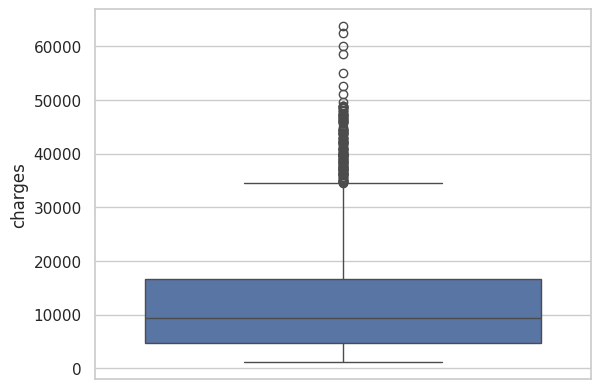

In [6]:
sns.set_theme(style="whitegrid")
sns.boxplot(Medical["charges"])

**This code generates a box plot of the "bmi" (body mass index) column in the DataFrame Medical, displaying the distribution and any outliers.**

<Axes: ylabel='bmi'>

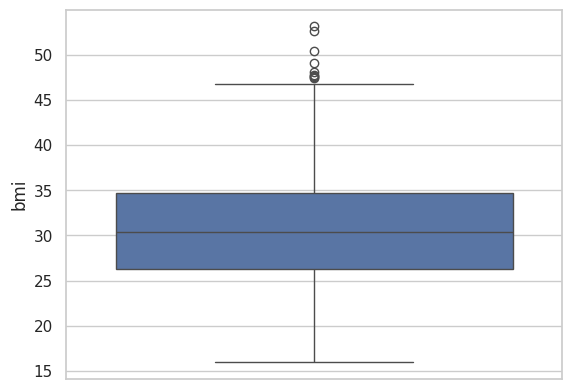

In [7]:
sns.boxplot(Medical["bmi"])

**This code groups the DataFrame "Medical" by the "sex" column, then calculates the mean and count of the "age" column for each group (male and female).**

In [8]:
Medical[["sex", "age"]].groupby("sex").agg(["mean", "count"])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

**"Medical["smoker"].value_counts()" counts the occurrences of unique values in the "smoker" column of the DataFrame "Medical", showing the number of smokers and non-smokers.**

In [9]:
Medical["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


**This code groups the DataFrame Medical by the "sex" column, then calculates the mean number of children for each group (male and female).**

In [10]:
Medical[["sex", "children"]].groupby("sex").agg(["mean"])

,children
,mean
sex,
female,1.074018
male,1.115385


**This code creates a scatter plot using Matplotlib and Seaborn, where the x-axis represents the "age" column, the y-axis represents the "bmi" column, points are colored by "sex", and different markers represent different sexes. The plot is displayed within a figure with a size of 8x6 inches.**

<Axes: xlabel='age', ylabel='bmi'>

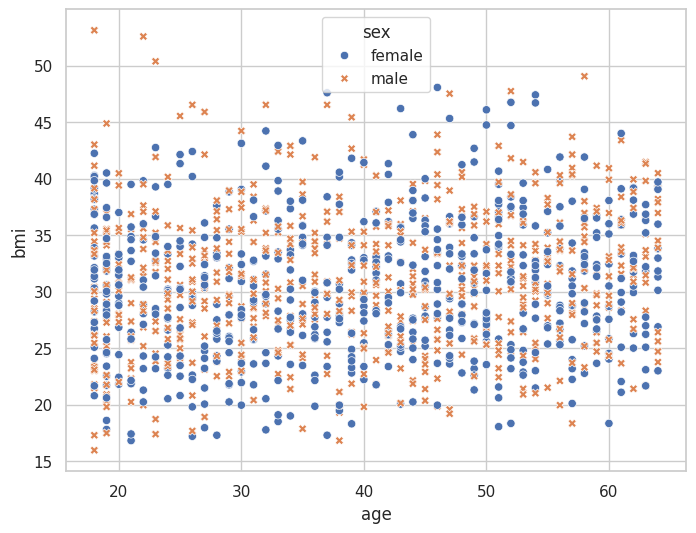

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Medical, x="age", y='bmi', hue="sex", style="sex")

**This code generates a scatter plot using Seaborn, where the x-axis represents the "age" column, the y-axis represents the "charges" column, points are colored by "sex", and different markers represent different sexes.**

<Axes: xlabel='age', ylabel='charges'>

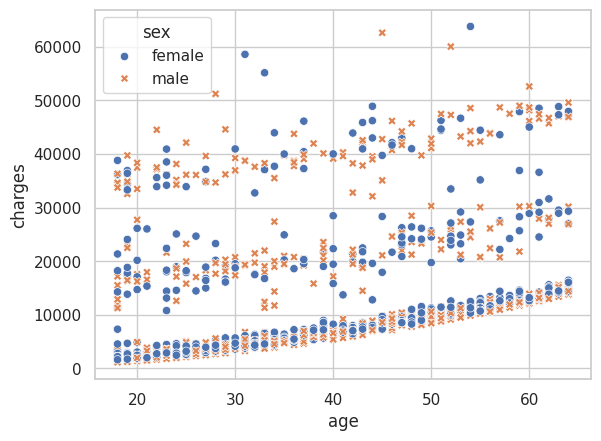

In [12]:
sns.scatterplot(data=Medical, x="age", y="charges", hue="sex", style="sex")

**This code creates a scatter plot using Seaborn, with the x-axis representing the "age" column, the y-axis representing the "charges" column, points colored by "smoker" status, and different markers indicating whether individuals are smokers or non-smokers.**

<Axes: xlabel='age', ylabel='charges'>

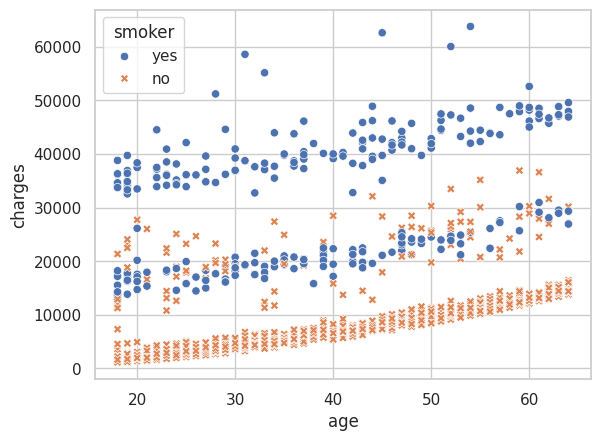

In [13]:
sns.scatterplot(data=Medical, x="age", y="charges", hue="smoker", style="smoker")

**This code filters the DataFrame "Medical", keeping only the rows where the value in the "bmi" column is less than 47.**

In [14]:
Medical = Medical[Medical["bmi"] < 47]

**After filtering the DataFrame "Medical" to exclude rows where the "bmi" value is less than 47, "Medical["smoker"].value_counts()" will provide the count of smokers and non-smokers in the updated DataFrame.**

In [15]:
Medical["smoker"].value_counts()

,count
smoker,
no,1058
yes,271


**Medical["region"].value_counts() counts the occurrences of unique values in the "region" column of the DataFrame Medical, showing the distribution of individuals across different regions.**


In [16]:
Medical["region"].value_counts()

,count
region,
southeast,357
northwest,325
southwest,324
northeast,323


**Medical["sex"].value_counts() counts the occurrences of unique values in the "sex" column of the DataFrame Medical, showing the distribution of individuals by gender.**

In [17]:
Medical["sex"].value_counts()

,count
sex,
male,670
female,659


**Medical.head(5) will display the first five rows of the filtered DataFrame Medical, showing the data after removing rows where the "bmi" value is less than 47.**

In [18]:
Medical.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Data Cleaning**

**This Python code defines a function label_encoder that utilizes scikit-learn's LabelEncoder to encode categorical features. It takes a single argument feat, which is expected to be a categorical feature, and returns the encoded version of that feature. The function also prints the name of the feature and the unique classes found in that feature.**

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

**This code iterates over the list of column names ["sex", "smoker"], and for each column name, it applies the label_encoder function to encode the corresponding categorical feature in the DataFrame Medical. Finally, it displays the first five rows of the modified DataFrame Medical.**

In [20]:
name_list = ["sex", "smoker"]

for name in name_list:
    Medical[name] = label_encoder(Medical[name])

Medical.head(5)

sex ['female' 'male']
smoker ['no' 'yes']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**Medical["region"].unique() returns an array containing the unique values found in the "region" column of the DataFrame Medical, showing all distinct regions present in the dataset.**

In [21]:
Medical["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

**This code uses the pd.get_dummies() function to perform one-hot encoding on the "region" column of the DataFrame Medical, creating dummy variables for each unique region. The resulting DataFrame Medical will have new columns for each region, where each column indicates whether an individual belongs to that region or not. Finally, it displays the first five rows of the modified DataFrame.**


In [22]:
Medical = pd.get_dummies(Medical, columns=["region"])

Medical.head(5)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


**This code renames the columns generated from one-hot encoding of the "region" column in the DataFrame Medical to have more concise names. Finally, it displays the first five rows of the DataFrame with the renamed columns.**

In [23]:
Medical.rename(columns={"region_northeast" : "northeast"}, inplace=True)
Medical.rename(columns={"region_northwest" : "northwest"}, inplace=True)
Medical.rename(columns={"region_southeast" : "southeast"}, inplace=True)
Medical.rename(columns={"region_southwest" : "southwest"}, inplace=True)

Medical.head(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


**This code converts the columns "northeast", "northwest", "southeast", and "southwest" in the DataFrame Medical to integers using the astype() method. Finally, it displays the first five rows of the DataFrame with the converted columns.**

In [24]:
Medical["northeast"] = Medical["northeast"].astype(int)
Medical["northwest"] = Medical["northwest"].astype(int)
Medical["southeast"] = Medical["southeast"].astype(int)
Medical["southwest"] = Medical["southwest"].astype(int)

Medical.head(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


**This code creates a heatmap using Seaborn and Matplotlib, displaying the correlation matrix of the DataFrame Medical. The annot=True parameter adds annotations to each cell with the correlation values, the cmap="viridis" parameter sets the color map to "viridis", and the linewidths=.5 parameter specifies the width of the lines separating each cell. The figure size is set to 7x7 inches.**

<Axes: >

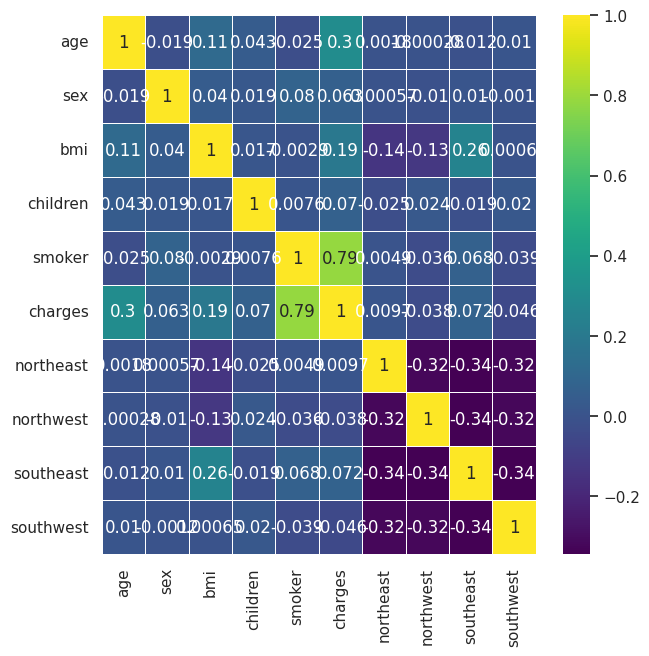

In [25]:
plt.figure(figsize=(7, 7))
sns.heatmap(Medical.corr(), annot=True, cmap="viridis", linewidths=.5)

**Dsiplays all the columns present in the DataFrame "Medical".**

In [26]:
Medical.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

# **Model Building**

**This code splits the DataFrame Medical into features (X) and target variable (y). X contains the selected columns: 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', and 'southwest'. y contains the 'charges' column, which represents the target variable to be predicted.**

In [28]:
X = Medical[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest']]

y = Medical['charges']

**This code imports the necessary modules for splitting data into training and testing sets (train_test_split from sklearn.model_selection) and for evaluating the accuracy of a model (accuracy_score from sklearn.metrics).**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**This code imports the RandomForestRegressor class from the sklearn.ensemble module, which is used to create a random forest regression model in scikit-learn.**

In [30]:
from sklearn.ensemble import RandomForestRegressor

**This code splits the features (X) and target variable (y) into training and testing sets using the train_test_split function from scikit-learn. It assigns 80% of the data to the training set (X_train and y_train) and 20% to the testing set (X_test and y_test).**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**1: n_estimators determines the number of decision trees in the Random Forest model, while n_jobs specifies the number of parallel jobs to run during training. Setting n_jobs=-1 utilizes all available CPU cores.**

**2: The fit() method is used to train the Random Forest Regressor model on the training data (X_train and y_train).**

**3: After training, the predict() method is applied to the testing data (X_test) to generate predictions (y_pred) for the target variable.**

**4: The score() method computes the coefficient of determination (R^2) of the model on both the training and testing sets. It quantifies the proportion of the variance in the target variable that is predictable from the input variables. Higher R^2 values indicate better model performance.**

**5: The training and testing accuracies are printed using print() statements, providing insights into how well the model fits the training data and generalizes to unseen data.**

In [32]:
RFR  = RandomForestRegressor(n_estimators=250, n_jobs= -1)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

RFR_Training_Accuracy = round(RFR.score(X_train, y_train) * 100, 2)
print("Random Forest Training Accuracy:",round(RFR_Training_Accuracy, 2), "%")

RFR_Testing_Accuracy = round(RFR.score(X_test, y_test) * 100, 2)
print("Random Forest Testing Accuracy:", round(RFR_Testing_Accuracy, 2), "%")

Random Forest Training Accuracy: 97.55 %
Random Forest Testing Accuracy: 85.18 %


**1: A Linear Regression model (LR) is initialized using the LinearRegression() constructor.**

**2: The fit() method is employed to train the linear regression model on the training data (X_train and y_train).**

**3: Following training, the model generates predictions (y_pred) for the target variable using the predict() method applied to the testing data (X_test).**

**4: The code computes and prints the training and testing accuracies of the linear regression model. LR.score(X_train, y_train) and LR.score(X_test, y_test) calculate the coefficient of determination (R^2) of the model on the training and testing sets, respectively. Higher R^2 values indicate better model fit.**

**5: The training and testing accuracies are printed using print() statements, providing insights into the performance of the linear regression model on both the training and testing datasets.**

In [33]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

LR_Training_Accuracy = round(LR.score(X_train, y_train) * 100, 2)
print("Linear Regression Training Accuracy:",round(LR_Training_Accuracy, 2), "%")

LR_Testing_Accuracy = round(LR.score(X_test, y_test) * 100, 2)
print("Linear Regression Testing Accuracy:", round(LR_Testing_Accuracy, 2), "%")

Linear Regression Training Accuracy: 74.37 %
Linear Regression Testing Accuracy: 77.12 %


**1; A Decision Tree Regressor (DTR) is initialized using the DecisionTreeRegressor() constructor.**

**2: The fit() method is used to train the decision tree regressor model on the training data (X_train and y_train).**

**3: After training, the model generates predictions (y_pred) for the target variable using the predict() method applied to the testing data (X_test).**

**4: The code computes and prints the training and testing accuracies of the decision tree regressor model. DTR.score(X_train, y_train) and DTR.score(X_test, y_test) calculate the coefficient of determination (R^2) of the model on the training and testing sets, respectively. Higher R^2 values indicate better model fit.**

**5: The training and testing accuracies are printed using print() statements, providing insights into the performance of the decision tree regressor model on both the training and testing datasets.**

In [34]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

DTR_Training_Accuracy = round(DTR.score(X_train, y_train) * 100, 2)
print("Decision Tree Training Accuracy:",round(DTR_Training_Accuracy, 2), "%")

DTR_Testing_Accuracy = round(DTR.score(X_test, y_test) * 100, 2)
print("Decision Tree Testing Accuracy:", round(DTR_Testing_Accuracy, 2), "%")

Decision Tree Training Accuracy: 99.83 %
Decision Tree Testing Accuracy: 71.5 %


# **Conclusion:**

*Random Forest Training Accuracy: 97.55 %*

*Random Forest Testing Accuracy: 85.18 %*

*Linear Regression Training Accuracy: 74.37 %*

*Linear Regression Testing Accuracy: 77.12 %*

*Decision Tree Training Accuracy: 99.83 %*

*Decision Tree Testing Accuracy: 71.5 %*

**Based on the results, Random Forest Regressor (RFR) is the best-performing model. While Decision Tree shows very high training accuracy (99.83%), its testing accuracy drops significantly (71.5%), indicating overfitting. In contrast, RFR maintains high accuracy on both training (97.55%) and testing (85.18%), demonstrating better generalization. Therefore, RFR is the most reliable model and should be saved for future use in a .pickle file.**

# **Save Model**

**This code saves the trained Random Forest Regressor model (RFR) to a file named "Finalized-Model.pickle" using the pickle.dump() function. The model is serialized and written to the file in binary mode ("wb"). This allows you to later load and reuse the model for making predictions without needing to retrain it.**

In [35]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)